# Omni-slurping with LLMing

Anton Antonov   
RakuForPrediction at WordPress   
March 2024

------

## Introduction

In this blog post we demonstrate the use of the Raku package "Data::Importers", that offers a convenient solution for importing data from URLs and files. This package supports a variety of data types such as CSV, HTML, PDF, text, and images, making it a versatile tool for data manipulation.

One particularly interesting application of "Data::Importers" is its inclusion into workflows based on Large Language Models (LLMs). Generally speaking, having an easy way to ingest diverse range of data formats -- like what "Data::Importers" aims to do -- makes a wide range of workflows for data processing and analysis easier to create.

In this blog post, we will demonstrate how "Data::Importers" can work together with LLMs, providing real-world examples of their combined usage in various situations. Essentially, we will illustrate the power of merging omni-slurping with LLM-ing to improve data-related activities.


The main function of "Data::Importers" is the `data-import` function. Its functionalities are incorporated into suitable overloads of the built-in `slurp` subroutine.


-----

## Setup

Here a lot of packages used below:

In [3]:
use Data::Importers;
use Data::Reshapers;
use Data::Summarizers;
use JSON::Fast;
use JavaScript::D3;

Here we configure the Jupyter notebook to display JavaScript graphics, [AAp7, AAv1]:

In [18]:
#% javascript

require.config({
     paths: {
     d3: 'https://d3js.org/d3.v7.min'
}});

require(['d3'], function(d3) {
     console.log(d3);
});

------

## HTML import demo

A key motivation behind creating the "Data::Importers" package was to efficiently retrieve HTML pages, extract plain text, and import it into a Jupyter notebook for subsequent LLM transformations and content processing.

Here is a pipeline that gets an LLM summary of a certain recent [Raku blog post](https://rakudoweekly.blog/2024/03/25/2024-13-veyoring-again):

In [6]:
my $htmlURL = 'https://rakudoweekly.blog/2024/03/25/2024-13-veyoring-again/';

$htmlURL
==> slurp(format => 'plaintext')
==> { say text-stats($_); $_ }()
==> llm-prompt('Summarize')()
==> llm-synthesize()

(chars => 2814 words => 399 lines => 125)


Paul Cochrane returns to the Raku community with a guide on enabling Continuous Integration on Raku projects using AppVeyor. Core developments include improvements by Elizabeth Mattijsen on Metamodel classes for faster compilation and performance. New and updated Raku modules are also featured in this week's news.

Here is another LLM pipeline that ingests the HTML page and produces an HTML table derived from the page's content:

In [7]:
#% html

$htmlURL
==> slurp(format => 'plaintext')
==> { say "Contributors table:"; $_ }() 
==> {["Cross tabulate into a HTML table the contributors", 
        "and type of content with the content itself", 
        "for the following text:\n\n", 
        $_, 
        llm-prompt('NothingElse')('HTML')]}()
==> llm-synthesize(e => llm-configuration('Gemini', max-tokens => 4096, temperature => 0.65))

Contributors table:


Contributor,Content Type,Content
Paul Cochrane,Tutorial,Building and testing Raku in AppVeyor
Dr. Raku,Tutorial,How To Delete Directories
Dr. Raku,Tutorial,Fun File Beginners Project
Dr. Raku,Tutorial,Hash Examples
Elizabeth Mattijsen,Development,Metamodel classes for faster compilation and performance and better stability
Stefan Seifert,Development,Fixed several BEGIN time lookup issues
Elizabeth Mattijsen,Development,Fixed an issue with =finish if there was no code
Samuel Chase,Shoutout,Nice shoutout!
Fernando Santagata,Self-awareness test,Self-awareness test
Paul Cochrane,Deep rabbit hole,A deep rabbit hole


------

## PDF import demo

Another frequent utilization of LLMs is the processing of PDF files found (intentionally or not) while browsing the Web. (Like, arXiv.org articles, UN resolutions, or court slip opinions.)

Here is a pipeline that gets an LLM summary of an oral argument brought up recently (2024-03-18) to The US Supreme Court, ([22-842 "NRA v. Vullo"](https://www.supremecourt.gov/oral_arguments/argument_transcripts/2023/22-842_c1o2.pdf)):

In [ ]:
'https://www.supremecourt.gov/oral_arguments/argument_transcripts/2023/22-842_c1o2.pdf'
==> slurp(format=>'text')
==> llm-prompt('Summarize')()
==> llm-synthesize(e=>llm-configuration('ChatGPT', model => 'gpt-4-turbo-preview'))

The Supreme Court of the United States dealt with a case involving the National Rifle Association (NRA) and Maria T. Vullo, challenging actions taken by New York officials against the NRA's insurance programs. The NRA argued that their First Amendment rights were violated when New York officials, under the guidance of Maria Vullo and Governor Andrew Cuomo, used coercive tactics to persuade insurance companies and banks to sever ties with the NRA, citing the promotion of guns as the reason. These actions included a direct threat of regulatory repercussions to insurance underwriter Lloyd's and the issuance of guidance letters to financial institutions, suggesting reputational risks associated with doing business with the NRA. The court discussed the plausibility of coercion and the First Amendment claim, reflecting on precedents like Bantam Books, and the extent to which government officials can use their regulatory power to influence the actions of third parties against an organization 

----

## Image vision

One of the cooler recent LLM-services enhancements is the access to AI-vision models. For example, AI-vision models are currently available through interfaces of OpenAI, Gemini, or LLaMA.

Here we use `data-import` instead of (the overloaded) `slurp`:

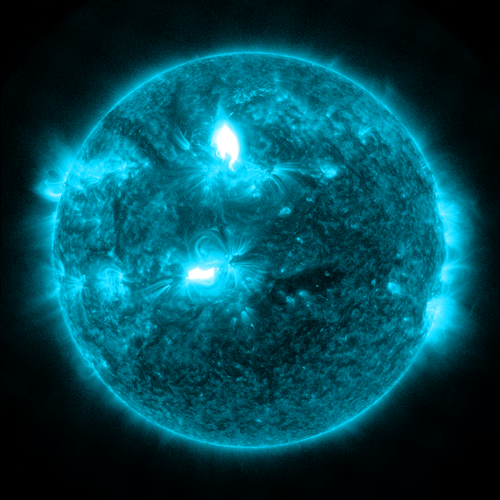

In [56]:
#% markdown
my $imgURL2 = 'https://www.wolframcloud.com/files/04e7c6f6-d230-454d-ac18-898ee9ea603d/htmlcaches/images/2f8c8b9ee8fa646349e00c23a61f99b8748559ed04da61716e0c4cacf6e80979';
my $img2 = data-import($imgURL2, format => 'md-image');

Here is AI-vision invocation:

In [57]:
llm-vision-synthesize('Describe the image', $img2, e => 'Gemini')

 The image shows a blue-white sphere with bright spots on its surface. The sphere is the Sun, and the bright spots are solar flares. Solar flares are bursts of energy that are released from the Sun's surface. They are caused by the sudden release of magnetic energy that has built up in the Sun's atmosphere. Solar flares can range in size from small, localized events to large, global eruptions. The largest solar flares can release as much energy as a billion hydrogen bombs. Solar flares can have a number of effects on Earth, including disrupting radio communications, causing power outages, and triggering geomagnetic storms.

**Remark:** The image is taken from the Wolfram Community post ["Sympathetic solar flare and geoeffective coronal mass ejection"](https://community.wolfram.com/groups/-/m/t/3146725), [JB1].

**Remark:** The AI vision above is done Google's "gemini-pro-vision'. Alternatively, OpenAI's "gpt-4-vision-preview" can be used.

------

## Image vision with re-imaging

In this section we show how to import a certain statistical image, get data from the image, and make another similar statistical graph.

Here we ingest an image with statistics of fuel exports:

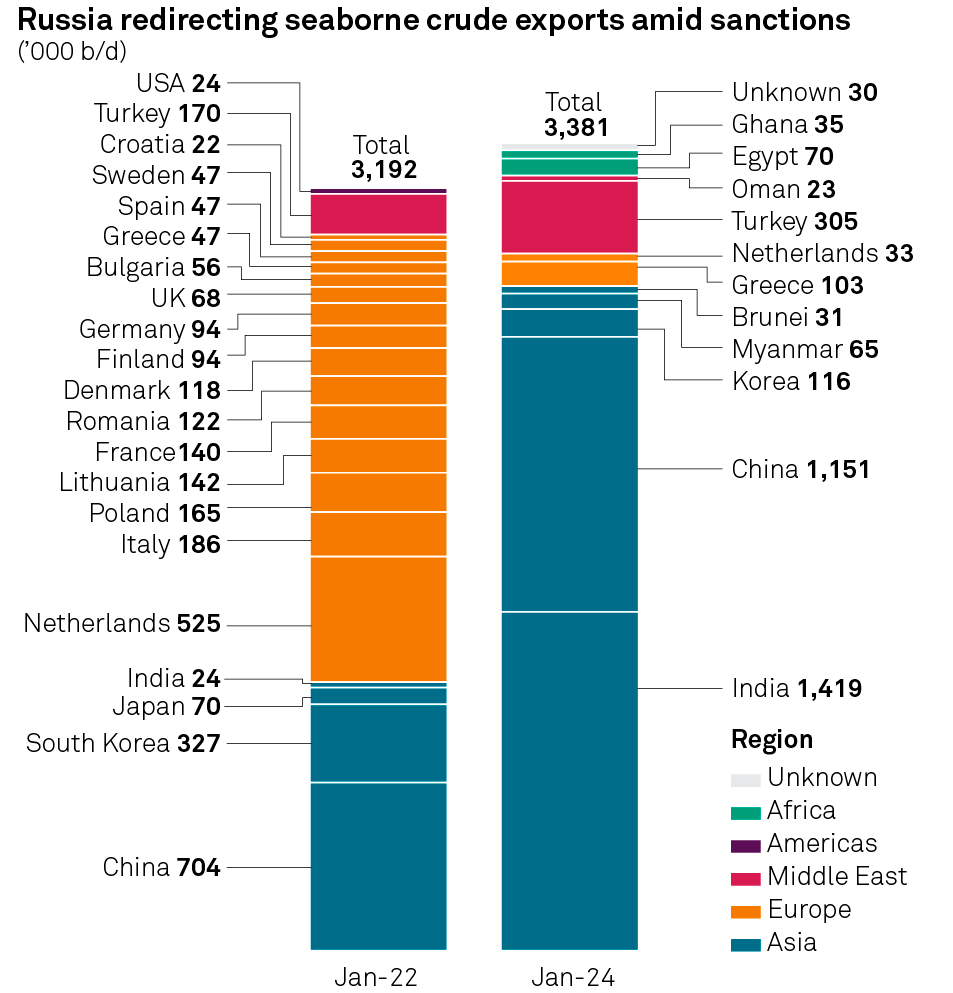

In [10]:
#% markdown
my $imgURL = 'https://pbs.twimg.com/media/GG44adyX0AAPqVa?format=png&name=medium';
my $img = data-import($imgURL, format => 'md-image')

Here is a fairly non-trivial request for data extraction from the image:

In [11]:
my $resFuel = llm-vision-synthesize([
    'Give JSON dictionary of the Date-Country-Values data in the image', 
    llm-prompt('NothingElse')('JSON')
    ], 
    $img, form => sub-parser('JSON'):drop)

[Date-Country-Values => {Jan-22 => {Bulgaria => 56, China => 704, Croatia => 22, Denmark => 118, Finland => 94, France => 140, Germany => 94, Greece => 47, India => 24, Italy => 186, Lithuania => 142, Netherlands => 525, Poland => 165, Romania => 122, South Korea => 327, Spain => 47, Sweden => 47, Total => 3192, Turkey => 170, UK => 68, USA => 24}, Jan-24 => {Brunei => 31, China => 1151, Egypt => 70, Ghana => 35, Greece => 103, India => 1419, Korea => 116, Myanmar => 65, Netherlands => 33, Oman => 23, Total => 3381, Turkey => 305, Unknown => 30}}]

Here is we modify the prompt above in order to get a dataset (an array of hashes):

In [12]:
my $resFuel2 = llm-vision-synthesize([
    'For data in the image give the corresponding JSON table that is an array of dictionaries each with the keys "Date", "Country", "Value".', 
    llm-prompt('NothingElse')('JSON')
    ],
    $img, 
    max-tokens => 4096,
    form => sub-parser('JSON'):drop)

[{Country => USA, Date => Jan-22, Value => 24} {Country => Turkey, Date => Jan-22, Value => 170} {Country => Croatia, Date => Jan-22, Value => 22} {Country => Sweden, Date => Jan-22, Value => 47} {Country => Spain, Date => Jan-22, Value => 47} {Country => Greece, Date => Jan-22, Value => 47} {Country => Bulgaria, Date => Jan-22, Value => 56} {Country => UK, Date => Jan-22, Value => 68} {Country => Germany, Date => Jan-22, Value => 94} {Country => Finland, Date => Jan-22, Value => 94} {Country => Denmark, Date => Jan-22, Value => 118} {Country => Romania, Date => Jan-22, Value => 122} {Country => France, Date => Jan-22, Value => 140} {Country => Lithuania, Date => Jan-22, Value => 142} {Country => Poland, Date => Jan-22, Value => 165} {Country => Italy, Date => Jan-22, Value => 186} {Country => Netherlands, Date => Jan-22, Value => 525} {Country => India, Date => Jan-22, Value => 24} {Country => Japan, Date => Jan-22, Value => 70} {Country => South Korea, Date => Jan-22, Value => 327} {

Here is how the obtained dataset looks like:

In [13]:
#% html
$resFuel2>>.Hash ==> data-translation()

Value,Date,Country
24,Jan-22,USA
170,Jan-22,Turkey
22,Jan-22,Croatia
47,Jan-22,Sweden
47,Jan-22,Spain
47,Jan-22,Greece
56,Jan-22,Bulgaria
68,Jan-22,UK
94,Jan-22,Germany
94,Jan-22,Finland


Here we rename or otherwise transform the columns of the dataset above in order to prepare it for creating a heatmap plot (we also show the deduced type):

In [163]:
my $k = 1;
my @fuelDataset = $resFuel2.map({ 
    my %h = $_.clone; 
    %h<z> = log10(%h<Value>); 
    %h<y> = %h<Country>; 
    %h<x> = %h<Date>; 
    %h<label> = %h<Value>;
    %h.grep({ $_.key ∈ <x y z label> }).Hash }).Array;

deduce-type(@fuelDataset);

Vector(Struct([label, x, y, z], [Int, Str, Str, Num]), 33)

Here is the heatmap plot:

In [164]:
#%js
js-d3-heatmap-plot(@fuelDataset,
                width => 700,
                height => 500,
                color-palette => 'Reds',
                plot-labels-color => 'White',
                plot-labels-font-size => 18,
                tick-labels-color => 'steelblue',
                tick-labels-font-size => 12,
                low-value => 0,
                high-value => 3.5,
                margins => {left => 100, right => 0},
                mesh => 0.01,
                title => 'Russia redirecting seaborne crude amid sanctions, 1000 b/d')

Here are the corresponding totals:

In [170]:
group-by($resFuel2, 'Date').map({ $_.key => $_.value.map(*<Value>).sum })

(Jan-24 => 3381 Jan-22 => 3192)

---- 

## CSV import

Here we ingest from GitHub a CSV file that has datasets metadata: 

In [171]:
my $csvURL = 'https://raw.githubusercontent.com/antononcube/Raku-Data-ExampleDatasets/main/resources/dfRdatasets.csv';
my $dsDatasets = data-import($csvURL, headers => 'auto');

say "Dimensions   : {$dsDatasets.&dimensions}";
say "Column names : {$dsDatasets.head.keys}";
say "Type         : {deduce-type($dsDatasets)}";

Dimensions   : 1745 12
Column names : n_logical n_character n_numeric Doc Rows Cols Package Title Item CSV n_binary n_factor
Type         : Vector(Assoc(Atom((Str)), Atom((Str)), 12), 1745)


Here is a table with a row sample:

In [172]:
#% html
my $field-names = <Package Item Title Rows Cols>;
my $dsDatasets2 = $dsDatasets>>.Hash.Array;
$dsDatasets2 = select-columns($dsDatasets2, $field-names);
$dsDatasets2.pick(12) ==> data-translation(:$field-names)

Package,Item,Title,Rows,Cols
robustbase,wagnerGrowth,Wagner's Hannover Employment Growth Data,63,7
openintro,age_at_mar,"Age at first marriage of 5,534 US women.",5534,1
AER,MurderRates,Determinants of Murder Rates in the United States,44,8
Stat2Data,RadioactiveTwins,Comparing Twins Ability to Clear Radioactive Particles,30,3
rpart,kyphosis,Data on Children who have had Corrective Spinal Surgery,81,4
boot,gravity,Acceleration Due to Gravity,81,2
survival,diabetic,Ddiabetic retinopathy,394,8
gap,mfblong,Internal functions for gap,3000,10
Ecdat,Mofa,"International Expansion of U.S. MOFAs (majority-owned Foreign Affiliates in Fire (finance, Insurance and Real Estate)",50,5
drc,chickweed,Germination of common chickweed (_Stellaria media_),35,3


Here we use an LLM to pick rows that related to certain subject:

In [52]:
my $res = llm-synthesize([
    'From the following JSON table pick the rows that are related to air pollution.', 
    to-json($dsDatasets2), 
    llm-prompt('NothingElse')('JSON')
], 
e => llm-configuration('ChatGPT', model => 'gpt-4-turbo-preview', max-tokens => 4096, temperature => 0.65),
form => sub-parser('JSON'):drop)

[{Cols => 6, Item => airquality, Package => datasets, Rows => 153, Title => Air Quality Data} {Cols => 5, Item => iris, Package => datasets, Rows => 150, Title => Edgar Anderson's Iris Data} {Cols => 11, Item => mtcars, Package => datasets, Rows => 32, Title => Motor Trend Car Road Tests} {Cols => 5, Item => USPersonalExpenditure, Package => datasets, Rows => 5, Title => US Personal Expenditure Data (1940-1950)} {Cols => 4, Item => USArrests, Package => datasets, Rows => 50, Title => US Arrests for Assault (1960)}]

In [177]:
use WWW::Gemini;
gemini-count-tokens(to-json($dsDatasets2))

{totalTokens => 99530}

Here is the tabulated result:

In [68]:
#% html
$res ==> data-translation(:$field-names)

Package,Item,Title,Rows,Cols
AER,CigarettesB,Cigarette Consumption Data,46,3
AER,CigarettesSW,Cigarette Consumption Panel Data,96,9
plm,Cigar,Cigarette Consumption,1380,9


------

## References

[JB1] Jeffrey Bryant​,
["Sympathetic solar flare and geoeffective coronal mass ejection​"](​https://community.wolfram.com/groups/-/m/t/3146725),
(2024),
[Wolfram Community](​https://community.wolfram.com).